In [695]:
!pip install nltk

In [696]:
!pip install newspaper3k

In [697]:
# import the libraries
import nltk
from newspaper import Article

In [698]:
# Get the article
url = 'https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/'
article = Article(url)

In [699]:
# Do some NLP
article.download()
article.parse()
nltk.download('punkt')
article.nlp()

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [700]:
# Get the authors
article.authors

['Ajay Bidyarthy']

In [701]:
# Get the publish date
article.publish_date

datetime.datetime(2021, 6, 26, 7, 7, 50, tzinfo=tzutc())

In [702]:
# Get the top image 
article.top_image

'https://insights.blackcoffer.com/wp-content/uploads/2021/06/h12-slider-image-2.jpg'

In [703]:
# Get the article text
print(article.text)

Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detectin

In [704]:
# Get a summary of the article
print(article.summary)

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.
In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.
Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.
ConclusionConsidering the vast range of tasks that an AI can do, it is evident that it holds deep potential in improving patient outcomes to skyrocketing levels.
Using sophisticated algorithms AI can bring a revolution in the healthcare sector.


In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4

In [706]:
!pip install textblob

In [707]:
# Connect website
URL='https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/'

In [708]:
page =requests.get(URL)

In [709]:
from bs4 import BeautifulSoup

In [710]:
page = BeautifulSoup(page.content, 'lxml')

In [711]:
page = page.getText(strip=True)

In [712]:
# Get the content
page

'AI in healthcare to Improve Patient Outcomes - Blackcoffer InsightsOur Success StoriesBanking, Financials, Securities, and InsuranceEnergyEntertainmentFast Moving Consumer GoodsGovernment & Think TanksHealthcareInfrastructure & Real EstateITLifestyle, eCommerce & Online Market PlaceProduction & ManufacturingResearch & AcademiaRetail & Supply ChainTelecomWhat We DoBanking, Financials, Securities, and InsuranceEnergyEntertainmentFast Moving Consumer GoodsGovernment & Think TanksHealthcareHospitalityInfrastructure & Real EstateIT ServicesLifestyle, eCommerce & Online Market PlaceNews & MediaProduction & ManufacturingResearch & AcademiaRetail & Supply ChainWhat We ThinkAutomobiles & ComponentsBFSIAsset and PortfolioBanksCapital MarketsDerivatives and SecuritiesDiversified FinancialsFinance & AccountingInsuranceSecurities and Capital MarketsCapital GoodsCommercial & Professional ServicesConsumer DiscretionaryConsumer Durables & ApparelConsumer ServicesConsumer StaplesFood & Staples Retaili

In [713]:
import re
# cleaning the data 

In [714]:
page = re.sub(r'\[\d+\]',"",page)

In [715]:
page = re.sub(r'\[\w+\]',"",page)

In [716]:
page = re.sub(r'\[0-9]+',"",page)

In [717]:
from nltk.tokenize import sent_tokenize

In [718]:
positive_negative_score = sent_tokenize(page)

In [719]:
len(positive_negative_score)

51

In [720]:
from textblob import TextBlob

In [721]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'
    

In [722]:
positive_negative_score = pd.DataFrame(positive_negative_score)
positive_negative_score.columns=['positive_negative_score']
positive_negative_score['sentiment']=[str(analyze_sentiment(x)) for x in positive_negative_score.positive_negative_score]

In [723]:
positive_negative_score.sentiment.value_counts()

Positive    34
Neutral     11
Negative     6
Name: sentiment, dtype: int64

In [724]:
positive_negative_score.sentiment

0     Positive
1     Positive
2     Positive
3     Negative
4     Negative
5     Positive
6     Positive
7     Positive
8     Positive
9     Positive
10     Neutral
11    Positive
12    Positive
13     Neutral
14    Positive
15     Neutral
16    Positive
17    Positive
18    Positive
19    Positive
20    Positive
21    Positive
22     Neutral
23    Positive
24    Negative
25    Positive
26    Positive
27    Positive
28    Negative
29    Positive
30    Positive
31    Positive
32    Positive
33     Neutral
34     Neutral
35    Positive
36    Positive
37    Negative
38    Negative
39     Neutral
40    Positive
41    Positive
42    Positive
43     Neutral
44     Neutral
45    Positive
46    Positive
47    Positive
48     Neutral
49    Positive
50     Neutral
Name: sentiment, dtype: object

In [725]:
from nltk.tokenize import word_tokenize
# converting sentences into words
pagewords = word_tokenize(page)
pagewords=[word for word in pagewords if word.isalnum()]

In [726]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
pagewords=[word for word in pagewords if not str.lower(word) in stop_words]

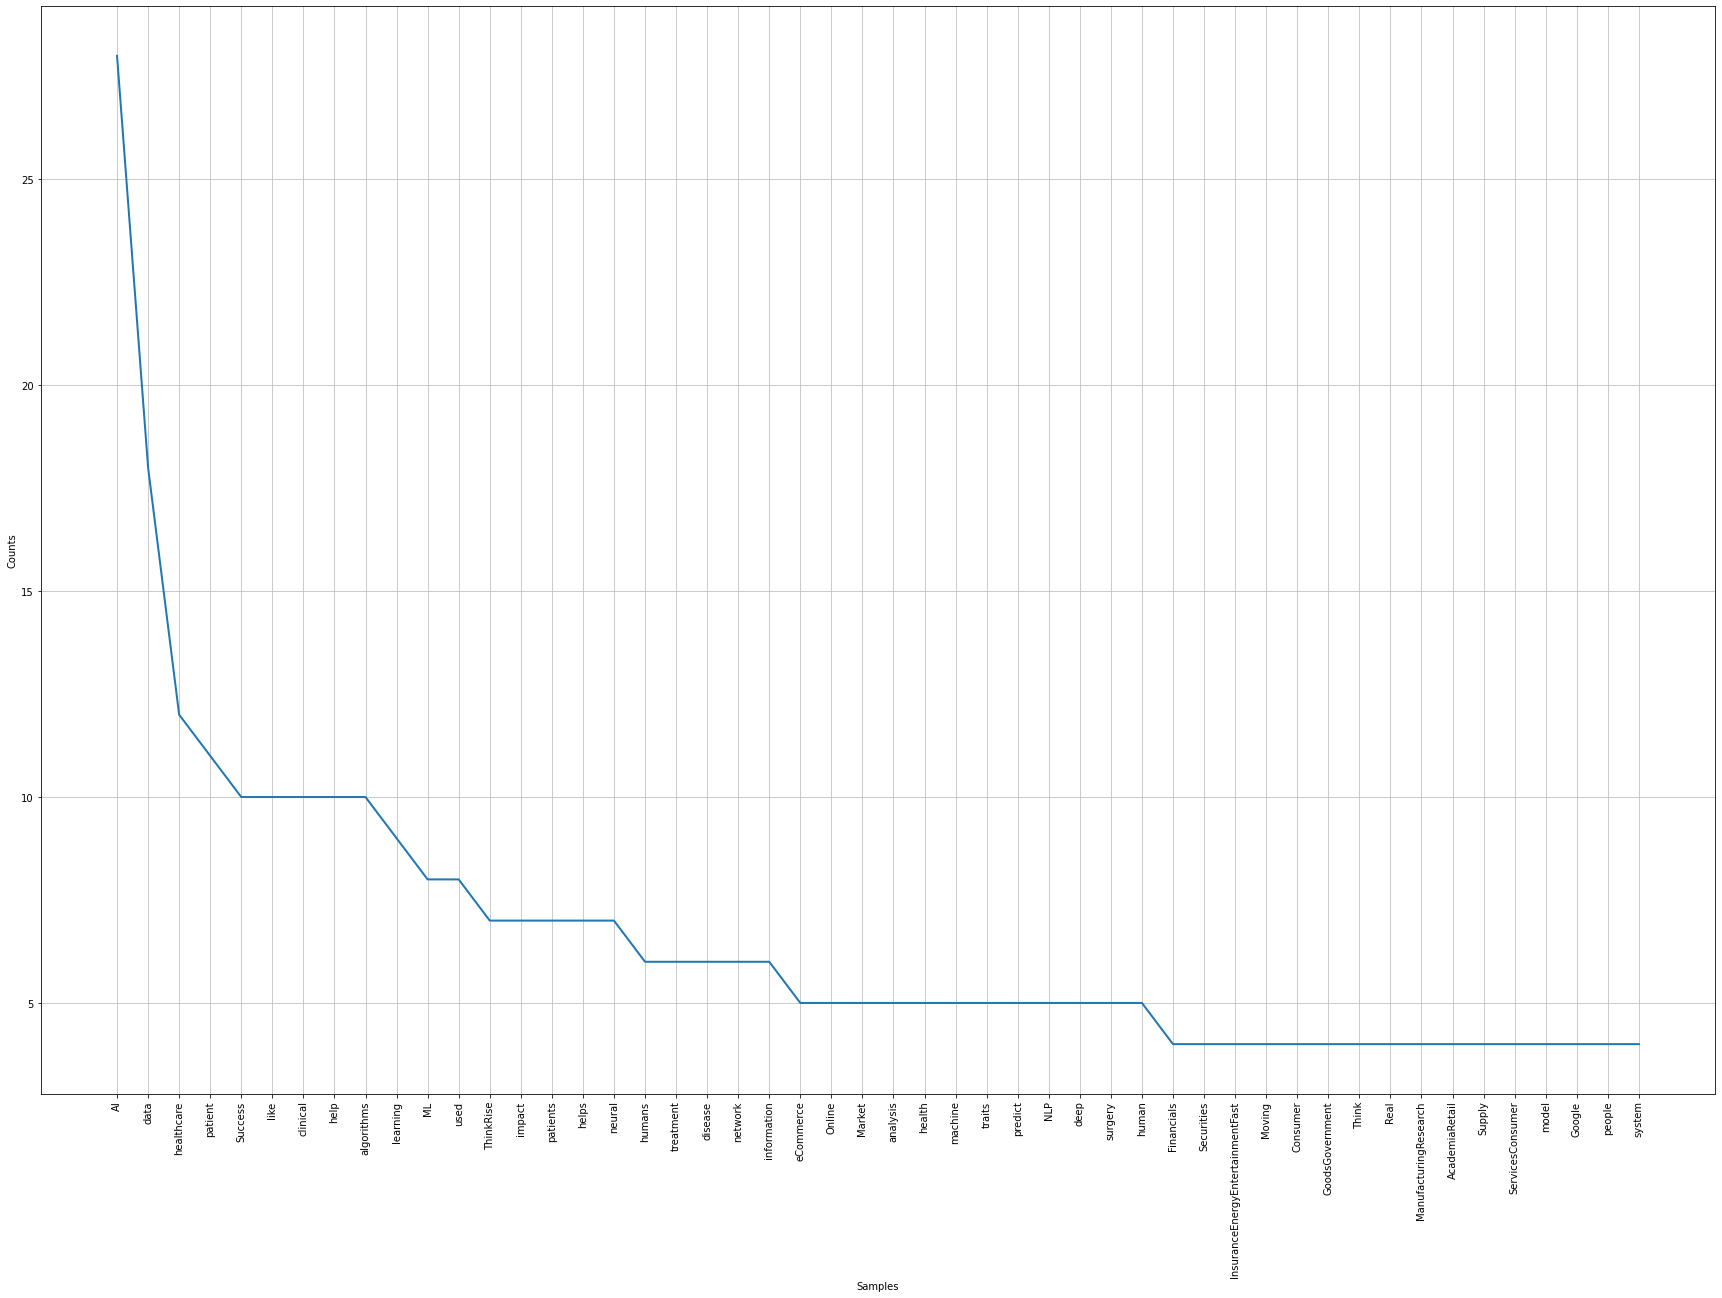

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [727]:
from nltk.probability import FreqDist
wordfreq=FreqDist(pagewords)
plt.figure(figsize=(30,20))
wordfreq.plot(50,cumulative=False)

In [728]:
wordfreq

FreqDist({'AI': 28, 'data': 18, 'healthcare': 12, 'patient': 11, 'Success': 10, 'like': 10, 'clinical': 10, 'help': 10, 'algorithms': 10, 'learning': 9, ...})

In [729]:
!pip install wordcloud

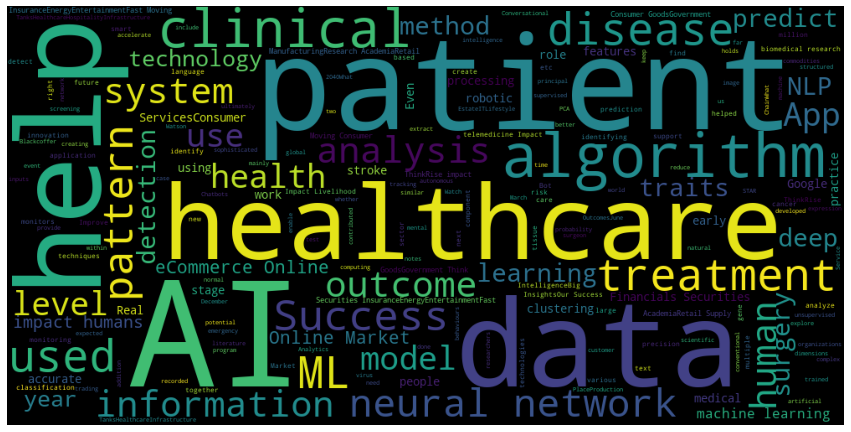

In [730]:
from wordcloud import WordCloud
page_words=(" ").join(pagewords)
wordcloud=WordCloud(width=1000,height=500).generate(page_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [731]:
polarity_subjectivity_score = TextBlob("""Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis.""")

In [732]:
# to find polarity
polarity_subjectivity_score.sentiment

Sentiment(polarity=0.12305356881443837, subjectivity=0.44504590417633905)

In [733]:
# number of words occurence in the paragraph
polarity_subjectivity_score.word_counts

defaultdict(int,
            {'introduction': 1,
             '“': 3,
             'if': 1,
             'anything': 1,
             'kills': 1,
             'over': 2,
             '10': 1,
             'million': 3,
             'people': 3,
             'in': 34,
             'the': 65,
             'next': 2,
             'few': 2,
             'decades': 1,
             'it': 12,
             'will': 2,
             'be': 8,
             'a': 22,
             'highly': 1,
             'infectious': 1,
             'virus': 3,
             'rather': 1,
             'than': 2,
             'war': 1,
             'not': 2,
             'missiles': 1,
             'but': 1,
             'microbes': 1,
             '”': 3,
             'bill': 1,
             'gates': 1,
             '’': 8,
             's': 7,
             'remarks': 1,
             'at': 7,
             'ted': 1,
             'conference': 1,
             '2014': 1,
             'right': 2,
             'after': 4,


In [734]:
# length of the words
len(polarity_subjectivity_score)

10033

In [735]:
import nltk
from nltk.probability import FreqDist
import os
import nltk.corpus
count = """Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""


In [736]:
tokens = nltk.word_tokenize(count)

In [737]:
tokens

['Introduction',
 '“',
 'If',
 'anything',
 'kills',
 'over',
 '10',
 'million',
 'people',
 'in',
 'the',
 'next',
 'few',
 'decades',
 ',',
 'it',
 'will',
 'be',
 'a',
 'highly',
 'infectious',
 'virus',
 'rather',
 'than',
 'a',
 'war',
 '.',
 'Not',
 'missiles',
 'but',
 'microbes.',
 '”',
 'Bill',
 'Gates',
 '’',
 's',
 'remarks',
 'at',
 'a',
 'TED',
 'conference',
 'in',
 '2014',
 ',',
 'right',
 'after',
 'the',
 'world',
 'had',
 'avoided',
 'the',
 'Ebola',
 'outbreak',
 '.',
 'When',
 'the',
 'new',
 ',',
 'unprecedented',
 ',',
 'invisible',
 'virus',
 'hit',
 'us',
 ',',
 'it',
 'met',
 'an',
 'overwhelmed',
 'and',
 'unprepared',
 'healthcare',
 'system',
 'and',
 'oblivious',
 'population',
 '.',
 'This',
 'public',
 'health',
 'emergency',
 'demonstrated',
 'our',
 'lack',
 'of',
 'scientific',
 'consideration',
 'and',
 'underlined',
 'the',
 'alarming',
 'need',
 'for',
 'robust',
 'innovations',
 'in',
 'our',
 'health',
 'and',
 'medical',
 'facilities',
 '.',
 'Fo

In [738]:
print(os.listdir(nltk.data.find('corpora')))

['brown', 'brown.zip', 'cmudict', 'cmudict.zip', 'stopwords', 'stopwords.zip']


In [739]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [740]:
polarity_subjectivity_score.word_counts["""Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""
]

0

In [741]:
# to find the sentences
polarity_subjectivity_score.sentences

[Sentence("Introduction
 
 “If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war."),
 Sentence("Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak."),
 Sentence("When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population."),
 Sentence("This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities."),
 Sentence("For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research."),
 Sentence("After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic."),
 Sente

In [742]:
# sentences length count
len(polarity_subjectivity_score.sentences)

61

In [743]:
!pip install pathlib

In [744]:
!pip install pycountry

In [745]:
from textblob import TextBlob
import nltk
from pathlib import Path
import pycountry
nltk.download('punkt')
nltk.download('brown')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading brown: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [746]:
polarity_subjectivity_score.noun_phrases.count("""Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis.""")

0

In [747]:
# Phrase count
text_misspelled ="""Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""
blob = TextBlob(text_misspelled)
correct_spelling = blob.correct()
correct_spelling

TextBlob("Introduction

“Of anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Will Rates’s remarks at a TED conference in 2014, right after the world had avoided the Bold outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and prepared healthcare system and oblivious population. His public health emergency demonstrated our lack of scientific consideration and undermined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has prove to be of tangible potential in the healthcare sector, clinical practices, translation medical and biomedical research.

After the first case was detected in China on December must 2019, it was an of program developed by BlueDot that averted the world about the anaemic. It was quick to realise of’s ability to analyse large chinks of data could help in directi

In [748]:
txt = """Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""
blob=TextBlob(txt)
blob.sentiment

Sentiment(polarity=0.12305356881443837, subjectivity=0.44504590417633905)

In [749]:
# find ocurences
count = 0
for sentence in blob.sentences:
    sentence.sentiment.polarity
    count+=1
    print(count)
    print(sentence.sentiment.polarity)

1
-0.013333333333333336
2
0.2857142857142857
3
0.36818181818181817
4
-0.03333333333333333
5
-0.21000000000000002
6
0.175
7
0.18253968253968253
8
0.5
9
0.0
10
0.275
11
0.85
12
0.0
13
0.1
14
0.08333333333333333
15
0.16666666666666666
16
0.0
17
0.03333333333333333
18
0.0
19
0.0
20
-0.037777777777777785
21
0.07738095238095238
22
0.0
23
0.05
24
0.0
25
0.075
26
0.0
27
-0.1
28
0.14444444444444446
29
-0.07142857142857142
30
0.05
31
0.4166666666666667
32
0.0
33
0.17142857142857143
34
0.10000000000000002
35
0.32857142857142857
36
0.0
37
0.25
38
0.3
39
0.0
40
0.1
41
0.3333333333333333
42
0.0
43
0.020833333333333332
44
0.25
45
-0.04285714285714286
46
0.0
47
0.0
48
0.0
49
0.15757575757575756
50
0.2
51
0.008333333333333333
52
-0.05
53
0.05
54
0.3
55
0.0625
56
0.03333333333333333
57
0.36309523809523814
58
0.0
59
0.0
60
0.075
61
0.0


In [750]:
import nltk
from nltk.tokenize import word_tokenize

In [751]:
result = word_tokenize(txt)

In [752]:
# print the words seperately
print(result)

['Introduction', '“', 'If', 'anything', 'kills', 'over', '10', 'million', 'people', 'in', 'the', 'next', 'few', 'decades', ',', 'it', 'will', 'be', 'a', 'highly', 'infectious', 'virus', 'rather', 'than', 'a', 'war', '.', 'Not', 'missiles', 'but', 'microbes.', '”', 'Bill', 'Gates', '’', 's', 'remarks', 'at', 'a', 'TED', 'conference', 'in', '2014', ',', 'right', 'after', 'the', 'world', 'had', 'avoided', 'the', 'Ebola', 'outbreak', '.', 'When', 'the', 'new', ',', 'unprecedented', ',', 'invisible', 'virus', 'hit', 'us', ',', 'it', 'met', 'an', 'overwhelmed', 'and', 'unprepared', 'healthcare', 'system', 'and', 'oblivious', 'population', '.', 'This', 'public', 'health', 'emergency', 'demonstrated', 'our', 'lack', 'of', 'scientific', 'consideration', 'and', 'underlined', 'the', 'alarming', 'need', 'for', 'robust', 'innovations', 'in', 'our', 'health', 'and', 'medical', 'facilities', '.', 'For', 'the', 'past', 'few', 'years', ',', 'artificial', 'intelligence', 'has', 'proven', 'to', 'be', 'of

In [753]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10054] An existing connection was forcibly
[nltk_data]     closed by the remote host>


False

In [754]:
final = nltk.pos_tag(result)
final

[('Introduction', 'NNP'),
 ('“', 'NNP'),
 ('If', 'IN'),
 ('anything', 'NN'),
 ('kills', 'VBZ'),
 ('over', 'IN'),
 ('10', 'CD'),
 ('million', 'CD'),
 ('people', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('next', 'JJ'),
 ('few', 'JJ'),
 ('decades', 'NNS'),
 (',', ','),
 ('it', 'PRP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('highly', 'RB'),
 ('infectious', 'JJ'),
 ('virus', 'NN'),
 ('rather', 'RB'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('war', 'NN'),
 ('.', '.'),
 ('Not', 'RB'),
 ('missiles', 'NNS'),
 ('but', 'CC'),
 ('microbes.', 'JJ'),
 ('”', 'NNP'),
 ('Bill', 'NNP'),
 ('Gates', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('remarks', 'NNS'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('TED', 'NNP'),
 ('conference', 'NN'),
 ('in', 'IN'),
 ('2014', 'CD'),
 (',', ','),
 ('right', 'RB'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('had', 'VBD'),
 ('avoided', 'VBN'),
 ('the', 'DT'),
 ('Ebola', 'NNP'),
 ('outbreak', 'NN'),
 ('.', '.'),
 ('When', 'WRB'),
 ('the', 'DT'),
 ('new', 'JJ'),
 (',', ','),


In [755]:
import nltk
nltk.download('tagsets')

[nltk_data] Error loading tagsets: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [756]:
# Personal pronouns
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [757]:
# Number of occurence of personal pronouns
personal_pronoun = 0
for i in range(0,len(final)):
    if(final[i][1]=='PRP'):
        personal_pronoun+=1
        print(final[i][0])
        print(personal_pronoun)

it
1
us
2
it
3
it
4
It
5
them
6
they
7
it
8
they
9
it
10
It
11
it
12
it
13
they
14
it
15
it
16
it
17


In [758]:
# convert the sentence into words
txt.split(' ')

['Introduction\n\n“If',
 'anything',
 'kills',
 'over',
 '10',
 'million',
 'people',
 'in',
 'the',
 'next',
 'few',
 'decades,',
 'it',
 'will',
 'be',
 'a',
 'highly',
 'infectious',
 'virus',
 'rather',
 'than',
 'a',
 'war.',
 'Not',
 'missiles',
 'but',
 'microbes.”',
 'Bill',
 'Gates’s',
 'remarks',
 'at',
 'a',
 'TED',
 'conference',
 'in',
 '2014,',
 'right',
 'after',
 'the',
 'world',
 'had',
 'avoided',
 'the',
 'Ebola',
 'outbreak.',
 'When',
 'the',
 'new,',
 'unprecedented,',
 'invisible',
 'virus',
 'hit',
 'us,',
 'it',
 'met',
 'an',
 'overwhelmed',
 'and',
 'unprepared',
 'healthcare',
 'system',
 'and',
 'oblivious',
 'population.',
 'This',
 'public',
 'health',
 'emergency',
 'demonstrated',
 'our',
 'lack',
 'of',
 'scientific',
 'consideration',
 'and',
 'underlined',
 'the',
 'alarming',
 'need',
 'for',
 'robust',
 'innovations',
 'in',
 'our',
 'health',
 'and',
 'medical',
 'facilities.',
 'For',
 'the',
 'past',
 'few',
 'years,',
 'artificial',
 'intellige

In [759]:
# length of the converted sentence into the words
len(txt.split(' '))

1455

In [760]:
# convert fullstop into words
nltk.word_tokenize(txt)

['Introduction',
 '“',
 'If',
 'anything',
 'kills',
 'over',
 '10',
 'million',
 'people',
 'in',
 'the',
 'next',
 'few',
 'decades',
 ',',
 'it',
 'will',
 'be',
 'a',
 'highly',
 'infectious',
 'virus',
 'rather',
 'than',
 'a',
 'war',
 '.',
 'Not',
 'missiles',
 'but',
 'microbes.',
 '”',
 'Bill',
 'Gates',
 '’',
 's',
 'remarks',
 'at',
 'a',
 'TED',
 'conference',
 'in',
 '2014',
 ',',
 'right',
 'after',
 'the',
 'world',
 'had',
 'avoided',
 'the',
 'Ebola',
 'outbreak',
 '.',
 'When',
 'the',
 'new',
 ',',
 'unprecedented',
 ',',
 'invisible',
 'virus',
 'hit',
 'us',
 ',',
 'it',
 'met',
 'an',
 'overwhelmed',
 'and',
 'unprepared',
 'healthcare',
 'system',
 'and',
 'oblivious',
 'population',
 '.',
 'This',
 'public',
 'health',
 'emergency',
 'demonstrated',
 'our',
 'lack',
 'of',
 'scientific',
 'consideration',
 'and',
 'underlined',
 'the',
 'alarming',
 'need',
 'for',
 'robust',
 'innovations',
 'in',
 'our',
 'health',
 'and',
 'medical',
 'facilities',
 '.',
 'Fo

In [761]:
# convert fullstop into words
len(nltk.word_tokenize(txt))

1663

In [762]:
# Average word length
word = txt.split()
average_word_length = sum(len(words) for word in words)/len(words)
average_word_length

10034.0

In [763]:
# Average length of sentence
sentence =  """ Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""
 

In [764]:
filtered = ''.join(filter(lambda x: x not in '".,;!-', sentence))
sents = [sent for sent in filtered.split() if sent]
avg_length_of_sentence = sum(map(len, sents))/len(sents)
avg_length_of_sentence

5.639244774106541

In [765]:
# Counting Avg Number of Words Per Sentence
import re
wordss =  """ Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""
parts = [len(l.split()) for l in re.split(r'[?!.]', wordss) if l.strip()]
avg_no_of_words_per_sentence=sum(parts)/len(parts)
avg_no_of_words_per_sentence


23.203125

In [766]:
import nltk
nltk.download('cmudict')

[nltk_data] Error loading cmudict: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


False

In [767]:
word = """ Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""


In [768]:
# Syllable per word
from nltk.corpus import cmudict
syllable_per_word = cmudict.dict()
def nsyl(word):
    return [len(list(y for y in x if y[-1].isdigit())) for x in syllable_per_word[word.lower()]] 

In [769]:
syllable_per_word

{'a': [['AH0'], ['EY1']],
 'a.': [['EY1']],
 'a42128': [['EY1',
   'F',
   'AO1',
   'R',
   'T',
   'UW1',
   'W',
   'AH1',
   'N',
   'T',
   'UW1',
   'EY1',
   'T']],
 'aaa': [['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1']],
 'aaberg': [['AA1', 'B', 'ER0', 'G']],
 'aachen': [['AA1', 'K', 'AH0', 'N']],
 'aachener': [['AA1', 'K', 'AH0', 'N', 'ER0']],
 'aaker': [['AA1', 'K', 'ER0']],
 'aalseth': [['AA1', 'L', 'S', 'EH0', 'TH']],
 'aamodt': [['AA1', 'M', 'AH0', 'T']],
 'aancor': [['AA1', 'N', 'K', 'AO2', 'R']],
 'aardema': [['AA0', 'R', 'D', 'EH1', 'M', 'AH0']],
 'aardvark': [['AA1', 'R', 'D', 'V', 'AA2', 'R', 'K']],
 'aaron': [['EH1', 'R', 'AH0', 'N']],
 "aaron's": [['EH1', 'R', 'AH0', 'N', 'Z']],
 'aarons': [['EH1', 'R', 'AH0', 'N', 'Z']],
 'aaronson': [['EH1', 'R', 'AH0', 'N', 'S', 'AH0', 'N'],
  ['AA1', 'R', 'AH0', 'N', 'S', 'AH0', 'N']],
 "aaronson's": [['EH1', 'R', 'AH0', 'N', 'S', 'AH0', 'N', 'Z'],
  ['AA1', 'R', 'AH0', 'N', 'S', 'AH0', 'N', 'Z']],
 'aarti': [['AA1', 'R', 'T', 'IY2'

In [770]:
def syllable_counts(word):
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("e"):
                count -= 1
    if count == 0:
        count += 1
    return count

In [771]:
syllable_count = syllable_counts(""" Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""
)



In [772]:
syllable_count

2877

In [773]:
complex_words  = 0
count =[""" Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""]



In [774]:
for myword in count:
    d = {}.fromkeys('aeiou',0)
    haslotsvowels = False
    for x in myword.lower():
        if x in d:
            d[x] += 1
    for q in d.values():
        if q > 2:
            haslotsvowels = True
    if haslotsvowels:
        complex_words  += 1
        
print(complex_words )

1


In [775]:
!pip install readability

In [776]:
words = """ Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""


In [777]:
from readability import Readability
r = Readability(words)
r.flesch_kincaid()
r.flesch()
r.gunning_fog()
r.coleman_liau()
r.dale_chall()
r.ari()
r.linsear_write()
r.smog()
r.spache()

In [778]:
r = Readability(words)

In [779]:
# Flesch-Kincaid Grade Level
# call
r.flesch_kincaid()
fk = r.flesch_kincaid()
print(fk.score)
print(fk.grade_level)

15.59653867895813
16


In [780]:
# Flesch Reading Ease
# call
r.flesch()
f = r.flesch()
print(f.score)
print(f.ease)
print(f.grade_levels)

25.502152672087675
very_confusing
['college_graduate']


In [781]:
# call
r.dale_chall()

In [782]:
# Coleman Liau Index
# call
r.coleman_liau()
cl = r.coleman_liau()
print(cl.score)
print(cl.grade_level)

15.61559681697613
16


In [783]:
# Fog Index
# call
r.gunning_fog()
Fog_Index = r.gunning_fog()
print(Fog_Index.score)
print(Fog_Index.grade_level)

18.270487454885423
college_graduate


In [784]:
# SMOG
# call
r.smog()
s = r.smog()
print(s.score)
print(s.grade_level)

16.52667757954773
17


In [785]:
# Automated Readability Index (ARI)
# call
r.ari()
ari = r.ari()
print(ari.score)
print(ari.grade_levels)
print(ari.ages)

17.05428968995956
['college_graduate']
[24, 100]


In [786]:
r.smog(all_sentences=True)

In [787]:
s = r.smog(all_sentences=True)
print(s.score)
print(s.grade_level)

16.891103035204708
17


In [788]:
# The Spache Readability Formula is used
# for Primary-Grade Reading Materials
s = r.spache()
print(s.score)
print(s.grade_level)

8.744466191242335
9


In [789]:
# words count 
import re
res = """ Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and identifying and tracking the possible carriers of the virus.

Many tracing apps use AI to keep tabs on the people who have been infected and prevent the risk of cross-infection by using AI algorithms that can track patterns and extract some features to classify or categorise them.

So how does AI do that?

IBM Watson, a sophisticated AI that works on cloud computing and natural language processing, has prominently contributed to the healthcare sector on a global level. Being a conversational AI, since 2013, Watson has helped in recommending treatments to patients suffering from cancer to ensure that they get the best treatment at optimum costs.

Researchers at Google Inc. showed that an AI system can be trained on thousands of images to achieve physician-level sensitivity.

By identifying the molecular patterns associated with disease status and its subtypes, gene expression, and protein abundance levels, machine learning methods can detect fatal diseases like cancer at an early stage. Machine Learning (ML) techniques focus mainly on analyzing structured data, which can further help in clustering patients’ traits and infer the probability of disease outcomes. Since patient traits mainly include masses of data relating to age, gender, disease history, disease-specific data like diagnostic imaging and gene expressions, etc, ML can extract features from these data inputs by constructing data analytical algorithms.

ML algorithms are either supervised or unsupervised. Unsupervised learning helps in extracting features and clustering similar features together that further leads to early detection of diseases. Clustering and principal component analysis enable grouping or clustering of similar traits together that are further used to maximize or minimize the similarity between the patients within or between the clusters. Since patient traits are recorded in multiple dimensions, such as genes, principal component analysis(PCA) creates the apparatus to reduce these dimensions which humans could have not done alone.

Supervised learning considers the outcomes of the subjects together with the traits, and further correlates the inputs with the outputs to predict the probability of getting a particular clinical event, expected value of a disease level or expected survival time, or risk of Down’s syndrome.

Biomarker panels that are mostly used to detect ovarian cancer, have outperformed the conventional statistical methods due to machine learning. In addition to this, the use of EHRs and Bayesian networks, which are a part of supervised machine learning algorithms, can predict clinical outcomes and mortality respectively.

Unstructured data such as clinical notes and texts are converted into machine-readable structured data with the help of natural language processing(NLP). NLP works with two components: text processing and classification. Text processing helps in identifying a series of disease-relevant keywords in clinical notes and then through classification are further categorized into normal and abnormal cases. Chest screening through ML and NLP has helped find abnormalities in the lungs and provide treatment to covid patients. Healthcare organizations use NLP-based chatbots to increase interactions with patients, keeping their mental health and wellness in check.

Deep learning is a modern extension of the classical neural network techniques which helps explore more complex non-linear patterns in data, using algorithms like convolution neural network, recurrent neural network, deep belief network, and deep neural network which enables more accurate clinical prediction. When it comes to genome interpretation, deep neural networks surpass the conventional methods of logistics regression and support vector machines.

Sepsis Watch is an AI system trained in deep learning algorithms that holds the capability to analyze over 32 million data points to create a patient’s risk score and identify the early stages of sepsis.

Another method known as the Learning-based Optimization of the Under Sampling Pattern( LOUPE) is based on integrating full resolution MRI scans with the convolutional neural network algorithm, which helps in creating more accurate reconstructions.

Robotic surgery is widely considered in most delicate surgeries like gynaecology and prostate surgery. Even after striking the right balance between human decisions and AI precision, robotic surgery reduces surgeon efficiency as they have to be manually operated through a console. Thus, autonomous robotic surgery is on the rise with inventions such as robotic silicon fingers that mimic the sense of touch that surgeons need to identify organs, cut tissues, etc., or robotic catheters that can navigate whether it is touching blood, tissue, or valve.

Researchers at Children’s National Hospital, Washington have already developed an AI called Smart Tissue Autonomous Robot (STAR), which performs a colon anastomosis on its own with the help of an ML-powered suturing tool, that automatically detects the patient’s breathing pattern to apply suture at the correct point.

An image of STAR during surgery.

Cloud computing in healthcare has helped in retrieving and sharing medical records safely with a reduction in maintenance costs. Through this technology doctors and various healthcare workers have access to detailed patient data that helps in speeding up analysis ultimately leading to better care in the form of more accurate information, medications, and therapies.

How can It help in Biomedical research?

Since AI can analyze literature beyond readability, it can be used to concise biomedical research. With the help of ML algorithms and NLP, AI can accelerate screening and indexing of biomedical research, by ranking the literature of interest which allows researchers to formulate and test scientific hypotheses far more precisely and quickly. Taking it to the next level, AI systems like the computational modelling assistant (CMA) helps researchers to construct simulation models from the concepts they have in mind. Such innovations have majorly contributed to topics such as tumour suppressor mechanisms and protein-protein interaction information extraction.

AI as precision medicine

Since precision medicine focuses on healthcare interventions to individuals or groups of patients based on their profile, the various AI devices pave the way to practice it more efficiently. With the help of ML, complex algorithms like large datasets can be used to predict and create an optimal treatment strategy.

Deep learning and neural networks can be used to process data in healthcare apps and keep a close watch on the patient’s emotional state, food intake, or health monitoring.

“Omics” refers to the collective technologies that help in exploring the roles, relationships of various branches ending with the suffix “omics” such as genomics, proteomics, etc. Omics-based tests based on machine learning algorithms help find correlations and predict treatment responses, ultimately creating personalized treatments for individual patients.

How it helps in psychology and neuro patients

For psychologists studying creativity, AI is promising new classes of experiments that are developing data structures and programs and exploring novel theories on a new horizon. Studies show that AI can conduct therapy sessions, e-therapy sessions, and assessments autonomously, also assisting human practitioners before, during, or after sessions. The Detection and Computational Analysis of Psychological Signal project uses ML, computer vision, and NLP to analyze language, physical gestures, and social signals to identify cues for human distress. This ground-breaking technology assesses soldiers returning from combat and recognizes those who require further mental health support. In the future, it will combine data captured during face-to-face interviews with information on sleeping, eating, and online behaviours for a complete patient view.

Stroke identification

Stroke is another frequently occurring disease that affects more than 500 million people worldwide. Thrombus, in the vessel cerebral infarction is the major (about 85%) cause of stroke occurrence. In recent years, AI techniques have been used in numerous stroke-related studies as early detection and timely treatment along with efficient outcome prediction can help solve the problem. With AI at our disposal, large amounts of data with rich information, more complications and real-life clinical questions can be addressed in this arena. Currently, two ML algorithms- genetic fuzzy finite state machine and PCA were implemented to build a model building solution. These include a human activity recognition stage and a stroke onset detection stage. An alert stroke message is activated as soon as a movement significantly different from the normal pattern is recorded. ML methods have been applied to neuroimaging data to assist disease evaluation and predicting stroke treatment for the diagnosis."""

# original string
print ("The original string is : \n" + res)
# using regex (findall()) function
Words_count = len(re.findall(r'\w+', res))
# total no of words
print ("The number of words in string are \n: " + str(Words_count))

The original string is : 
 Introduction

“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.

After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of 

In [795]:
# store the extracted data 
dataset = [[url,positive_negative_score.sentiment.value_counts(),polarity_subjectivity_score.sentiment,average_word_length,avg_length_of_sentence,avg_no_of_words_per_sentence,syllable_per_word,syllable_count,complex_words,Fog_Index,Words_count,personal_pronoun,wordfreq,tokens]]

In [796]:
# print the extracted data
dataset

[['https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/',
  Positive    34
  Neutral     11
  Negative     6
  Name: sentiment, dtype: int64,
  Sentiment(polarity=0.12305356881443837, subjectivity=0.44504590417633905),
  10034.0,
  5.639244774106541,
  23.203125,
  {'a': [['AH0'], ['EY1']],
   'a.': [['EY1']],
   'a42128': [['EY1',
     'F',
     'AO1',
     'R',
     'T',
     'UW1',
     'W',
     'AH1',
     'N',
     'T',
     'UW1',
     'EY1',
     'T']],
   'aaa': [['T', 'R', 'IH2', 'P', 'AH0', 'L', 'EY1']],
   'aaberg': [['AA1', 'B', 'ER0', 'G']],
   'aachen': [['AA1', 'K', 'AH0', 'N']],
   'aachener': [['AA1', 'K', 'AH0', 'N', 'ER0']],
   'aaker': [['AA1', 'K', 'ER0']],
   'aalseth': [['AA1', 'L', 'S', 'EH0', 'TH']],
   'aamodt': [['AA1', 'M', 'AH0', 'T']],
   'aancor': [['AA1', 'N', 'K', 'AO2', 'R']],
   'aardema': [['AA0', 'R', 'D', 'EH1', 'M', 'AH0']],
   'aardvark': [['AA1', 'R', 'D', 'V', 'AA2', 'R', 'K']],
   'aaron': [['EH1', 'R', 'AH0', 'N']],

In [797]:
# pass the data into dataframe and arrange them into column
df = pd.DataFrame(dataset, columns = ['url','positive_negative_score.sentiment.value_counts()','polarity_subjectivity_score.sentiment','avg_length_of_sentence','average_word_length','avg_no_of_words_per_sentence','syllable_per_word','syllable_count','complex_words','Fog_Index','Words_count','personal_pronoun','wordfreq','tokens'])

In [798]:
# print the df into column
df

,url,positive_negative_score.sentiment.value_counts(),polarity_subjectivity_score.sentiment,avg_length_of_sentence,average_word_length,avg_no_of_words_per_sentence,syllable_per_word,syllable_count,complex_words,Fog_Index,Words_count,personal_pronoun,wordfreq,tokens
0,https://insights.blackcoffer.com/ai-in-healthc...,Positive 34 Neutral 11 Negative 6 N...,"(0.12305356881443837, 0.44504590417633905)",10034.0,5.639245,23.203125,"{'a': [['AH0'], ['EY1']], 'a.': [['EY1']], 'a4...",2877,1,"score: 18.270487454885423, grade_level: 'colle...",1509,17,"{'AI': 28, 'healthcare': 12, 'Improve': 3, 'Pa...","[Introduction, “, If, anything, kills, over, 1..."


In [800]:
# save the file into excel
print(df)
df.to_excel("C:\\Users\\mk744\\Downloads\\Maruf_Khan.xlsx")

                                                 url  \
0  https://insights.blackcoffer.com/ai-in-healthc...   

    positive_negative_score.sentiment.value_counts()  \
0  Positive    34
Neutral     11
Negative     6
N...   

        polarity_subjectivity_score.sentiment  avg_length_of_sentence  \
0  (0.12305356881443837, 0.44504590417633905)                 10034.0   

   average_word_length  avg_no_of_words_per_sentence  \
0             5.639245                     23.203125   

                                   syllable_per_word  syllable_count  \
0  {'a': [['AH0'], ['EY1']], 'a.': [['EY1']], 'a4...            2877   

   complex_words                                          Fog_Index  \
0              1  score: 18.270487454885423, grade_level: 'colle...   

   Words_count  personal_pronoun  \
0         1509                17   

                                            wordfreq  \
0  {'AI': 28, 'healthcare': 12, 'Improve': 3, 'Pa...   

                                        